# Lineare Regression am Beispiel Diamanten-Datensatz

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## About Dataset
### Context

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.
### Content

- **price** price in US dollars (\$326--\$18,823)

- **carat** weight of the diamond (0.2--5.01)

- **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color** diamond colour, from J (worst) to D (best)

- **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x** length in mm (0--10.74)

- **y** width in mm (0--58.9)

- **z** depth in mm (0--31.8)

- **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- **table** width of top of diamond relative to widest point (43--95)

In [8]:
df = pd.read_csv("diamonds.csv")
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


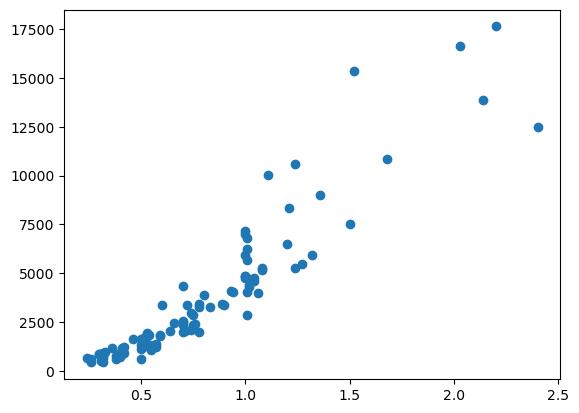

In [10]:
# Prüfen, ob linearer Zusammenhang
tmp_df=df.sample(100)

plt.scatter(x = tmp_df["carat"], y = tmp_df["price"])
plt.show()

In [12]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv("diamonds.csv")

In [14]:
# Slicing & Reshaping
X = df[['carat']].values  # Feature (nur Karat-Gewicht als unabhängige Variable)
y = df['price'].values

# Aufteilung in Trainings- (80%) und Testdaten (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [16]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)  # Training des Modells

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

In [18]:
# Params
print("Modellparameter:")
print(f"Steigung (Coefficient): {model.coef_[0]:.2f}")
print(f"y-Achsenabschnitt (Intercept): {model.intercept_:.2f}")
print("\nEvaluationsmetriken:")
print(f"Mittlerer quadratischer Fehler (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Bestimmtheitsmaß (R²): {r2_score(y_test, y_pred):.4f}")

Modellparameter:
Steigung (Coefficient): 7768.91
y-Achsenabschnitt (Intercept): -2261.91

Evaluationsmetriken:
Mittlerer quadratischer Fehler (MSE): 2401388.65
Bestimmtheitsmaß (R²): 0.8489


## Funktion zur Berechnung des Preises

Preis berechnen

y=kx+d

In [20]:
# Funktion
def preis_berechnen(carat):
    """
    Berechnet den vorhergesagten Preis eines Diamanten basierend auf Karat-Gewicht.
    
    Parameter:
    carat (float): Gewicht des Diamanten in Karat
    
    Returns:
    float: Vorhergesagter Preis in US-Dollar
    """
    steigung = model.coef_[0]
    intercept = model.intercept_
    return steigung * carat + intercept

# Beispielaufrufe
print(f"Preis für 0.5 Karat: ${preis_berechnen(0.5):.2f}")
print(f"Preis für 2 Karat: ${preis_berechnen(2):.2f}")

Preis für 0.5 Karat: $1622.54
Preis für 2 Karat: $13275.91


## Mit Modell Preis für fiktive Diamanten vorhersagen

In [22]:
# Vorhersage für spezifische Karat-Werte
karat_werte = [[0.25], [0.5], [1.0], [1.5], [2.0]]
vorhersagen = model.predict(karat_werte)

# Ausgabe der Vorhersagen
for karat, preis in zip(karat_werte, vorhersagen):
    print(f"{karat[0]:.2f} Karat → ${preis:.2f}")

0.25 Karat → $-319.68
0.50 Karat → $1622.54
1.00 Karat → $5507.00
1.50 Karat → $9391.45
2.00 Karat → $13275.91


## Gerade ausgeben
Wie benötigen 2 Punkte, um die gelernte Gerade konstruieren zu können.

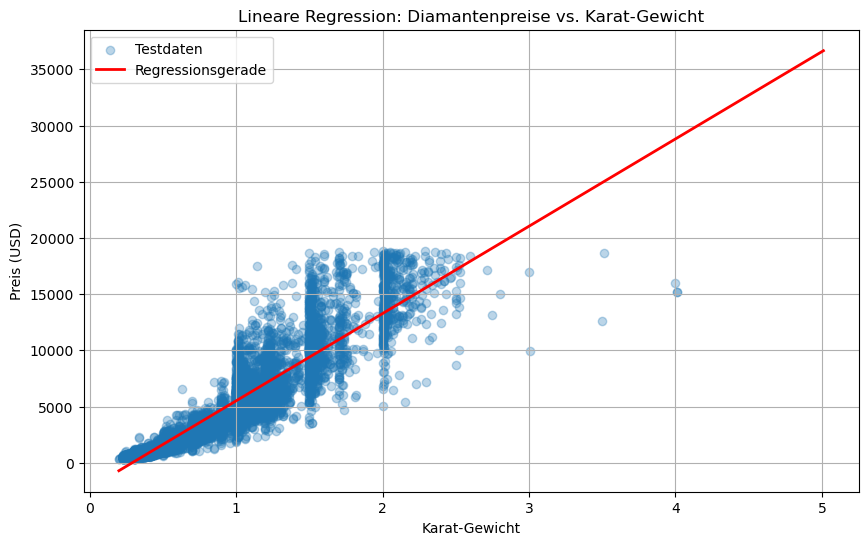

In [24]:
import matplotlib.pyplot as plt

# Zwei Punkte für die Gerade (min und max Karat-Werte)
x_werte = [[df['carat'].min()], [df['carat'].max()]]
y_werte = model.predict(x_werte)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Testdaten')
plt.plot(x_werte, y_werte, color='red', linewidth=2, label='Regressionsgerade')
plt.xlabel('Karat-Gewicht')
plt.ylabel('Preis (USD)')
plt.title('Lineare Regression: Diamantenpreise vs. Karat-Gewicht')
plt.legend()
plt.grid(True)
plt.show()

## Warum quadriert?

Die lineare Regression versucht, jeden Punkt so gut wie möglich zu beschreiben. Ein größerer Abstand wird mehr abgestraft, als immer nur ein bisschen danaben zu liegen.

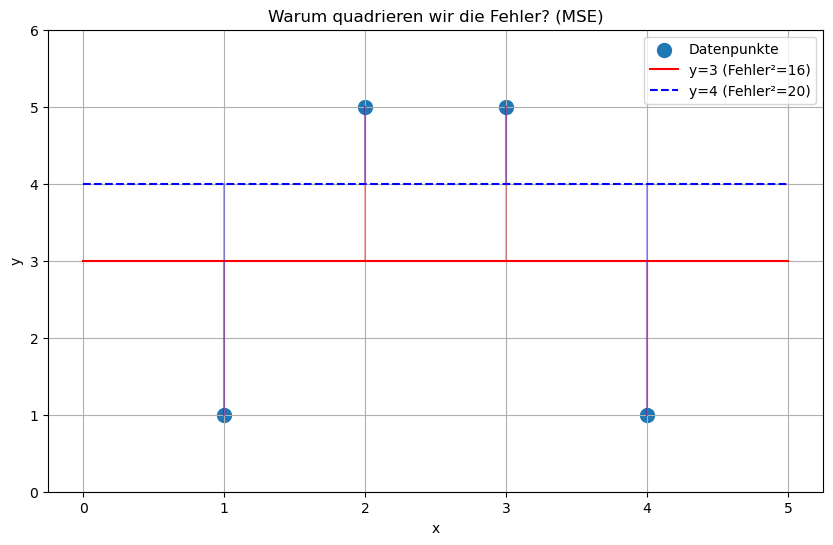

Fehlerquadratsumme für y=3: 16
Fehlerquadratsumme für y=4: 20


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Datenpunkte
xs = [1, 2, 3, 4]
ys = [1, 5, 5, 1]
line_y = 3  # Optimale Linie laut linearer Regression

# Fehlerberechnung
def berechne_fehlerquadrate(y_actual, y_predicted):
    return sum((y_actual - y_predicted)**2)

# Fehler für beide Linien
fehler_3 = berechne_fehlerquadrate(np.array(ys), line_y)
fehler_4 = berechne_fehlerquadrate(np.array(ys), 4)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, s=100, label='Datenpunkte')

# Horizontale Linien
plt.plot([0, 5], [line_y, line_y], color='red', 
         label=f'y={line_y} (Fehler²={fehler_3})')
plt.plot([0, 5], [4, 4], color='blue', 
         linestyle='--', label=f'y=4 (Fehler²={fehler_4})')

# Fehlerlinien einzeichnen
for x, y in zip(xs, ys):
    plt.plot([x, x], [y, line_y], color='red', alpha=0.3)
    plt.plot([x, x], [y, 4], color='blue', alpha=0.3)

plt.yticks(np.arange(0, 7, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Warum quadrieren wir die Fehler? (MSE)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fehlerquadratsumme für y={line_y}: {fehler_3}")
print(f"Fehlerquadratsumme für y=4: {fehler_4}")

In [ ]:
Andere weitere Funktionen zum Ausprobieren:

In [ ]:
1. Preisbereich für gegebenes Karatgewicht berechnen

In [28]:
def preisbereich(carat, prozentsatz=0.1):
    """
    Gibt den Preisbereich für ein Karatgewicht ± Prozentsatz an.
    """
    steigung = model.coef_[0]
    intercept = model.intercept_
    min_carat = carat * (1 - prozentsatz)
    max_carat = carat * (1 + prozentsatz)
    min_price = steigung * min_carat + intercept
    max_price = steigung * max_carat + intercept
    return min_price, max_price

# Beispiel
carat = 1.0
min_p, max_p = preisbereich(carat)
print(f"Preisbereich für {carat:.2f} Karat (±10 %): ${min_p:.2f} – ${max_p:.2f}")


Preisbereich für 1.00 Karat (±10 %): $4730.11 – $6283.89


In [ ]:
2. Visualisierung einer Preis-Karat-Kurve für viele Werte

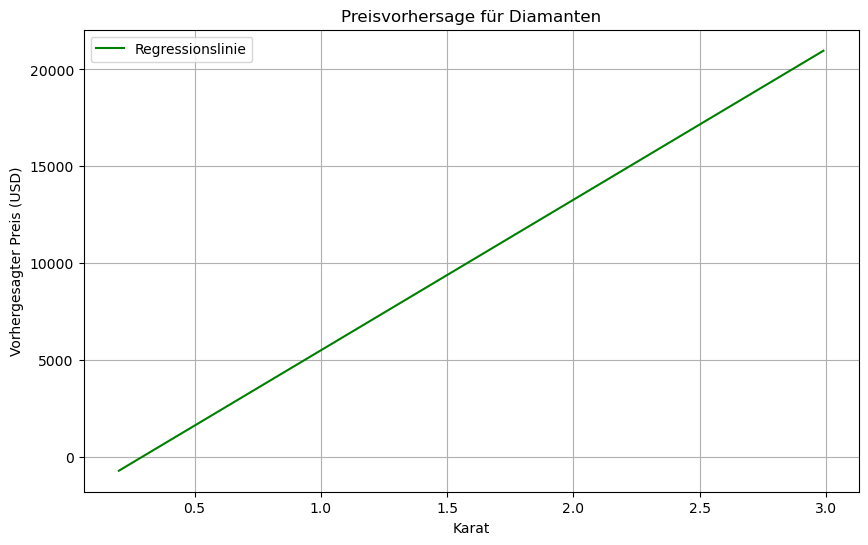

In [30]:
def preis_kurve_plot(min_carat=0.2, max_carat=3.0, schritte=0.01):
    """
    Zeichnet die Regressionskurve für einen Bereich von Karatwerten.
    """
    carats = np.arange(min_carat, max_carat, schritte).reshape(-1, 1)
    prices = model.predict(carats)

    plt.figure(figsize=(10, 6))
    plt.plot(carats, prices, color='green', label='Regressionslinie')
    plt.xlabel("Karat")
    plt.ylabel("Vorhergesagter Preis (USD)")
    plt.title("Preisvorhersage für Diamanten")
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot erzeugen
preis_kurve_plot()


In [ ]:
 3. Preissteigerung bei Karatzunahme berechnen

In [32]:
def preisdifferenz(carat1, carat2):
    """
    Gibt an, wie stark der Preis zwischen zwei Karat-Werten ansteigt.
    """
    preis1 = preis_berechnen(carat1)
    preis2 = preis_berechnen(carat2)
    return preis2 - preis1

# Beispiel
differenz = preisdifferenz(1.0, 1.5)
print(f"Preissteigerung von 1.0 auf 1.5 Karat: ${differenz:.2f}")


Preissteigerung von 1.0 auf 1.5 Karat: $3884.46


In [ ]:
 4. Histogramm tatsächlicher vs. vorhergesagter Preise

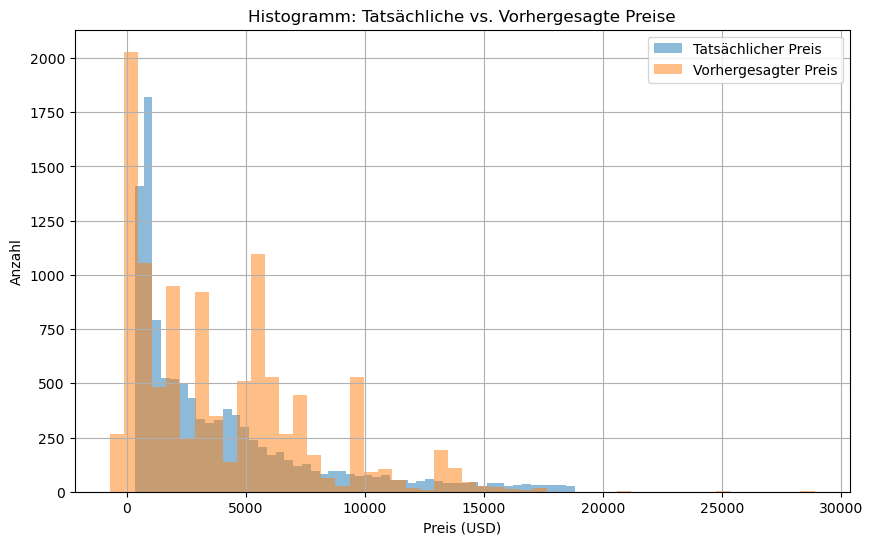

In [34]:
def preisvergleich_histogramm():
    """
    Vergleicht tatsächliche und vorhergesagte Preise im Histogramm.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(y_test, bins=50, alpha=0.5, label='Tatsächlicher Preis')
    plt.hist(y_pred, bins=50, alpha=0.5, label='Vorhergesagter Preis')
    plt.xlabel("Preis (USD)")
    plt.ylabel("Anzahl")
    plt.title("Histogramm: Tatsächliche vs. Vorhergesagte Preise")
    plt.legend()
    plt.grid(True)
    plt.show()

# Aufruf
preisvergleich_histogramm()


In [ ]:
 5. Mehrere Karat-Werte interaktiv berechnen

In [36]:
def batch_preis_berechnen(carat_liste):
    """
    Berechnet Preise für eine Liste von Karat-Werten.
    """
    for carat in carat_liste:
        preis = preis_berechnen(carat)
        print(f"{carat:.2f} Karat → ${preis:.2f}")

# Beispiel
karats = [0.3, 0.75, 1.2, 1.8, 2.5]
batch_preis_berechnen(karats)


0.30 Karat → $68.76
0.75 Karat → $3564.77
1.20 Karat → $7060.78
1.80 Karat → $11722.13
2.50 Karat → $17160.36
